In [2]:
# Importing Packages

import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
# Reading the dataset
data = pd.read_csv('11th April 2020/WHO-COVID-19-global-data.csv')

# Converting the datatype of dates to datetime
dates = pd.to_datetime(data['day'], format = '%Y-%m-%d')

# Adding dates to the dataframe
data['Date'] = dates

# Removing the original object datatype
data = data.drop(labels = ['day'], axis = 1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6997 entries, 0 to 6996
Data columns (total 8 columns):
Country                 6910 non-null object
Country Name            6997 non-null object
Region                  6932 non-null object
Deaths                  6997 non-null int64
Cumulative_Deaths       6997 non-null int64
Confirmed               6997 non-null int64
Cumulative_Confirmed    6997 non-null int64
Date                    6997 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 437.4+ KB


,Country,Country Name,Region,Deaths,Cumulative_Deaths,Confirmed,Cumulative_Confirmed,Date
5997,ES,Spain,EURO,394,1720,3646,28572,2020-03-23
5998,ES,Spain,EURO,462,2182,4517,33089,2020-03-24
5999,ES,Spain,EURO,514,2696,6584,39673,2020-03-25
6000,ES,Spain,EURO,738,3434,7937,47610,2020-03-26
6001,ES,Spain,EURO,655,4089,8578,56188,2020-03-27
6002,ES,Spain,EURO,769,4858,7871,64059,2020-03-28
6003,ES,Spain,EURO,832,5690,8189,72248,2020-03-29
6004,ES,Spain,EURO,838,6528,6549,78797,2020-03-30
6005,ES,Spain,EURO,812,7340,6398,85195,2020-03-31
6006,ES,Spain,EURO,849,8189,9222,94417,2020-04-01


In [5]:
# To separate country-wise data, grouping by Country name
grouped = data.groupby('Country Name')

In [6]:
# Dataset Preprocessing before running the model
def dataset_preprocess(df):
    
    # Setting date as the index of the dataframe
    df = df.set_index('Date')
    
    # Creating different columns with regressor variables
    ds = df.index.to_series()
    df['Day'] = ds.dt.day
    df['Month'] = ds.dt.month
    df['Weekday'] = ds.dt.dayofweek
    df['Year'] = ds.dt.year
    
    # Dropping the text columns which have same entries at each row
    df = df.drop(['Country', 'Country Name', 'Region'], axis = 1)
    df = df.drop(df.index[len(df)-1])
    
    #return the dataframe
    return(df)

In [7]:
## Isolating the datasets for different countries into different dataframes

USA = pd.DataFrame( (grouped.get_group('United States of America'))) 
Italy = pd.DataFrame((grouped.get_group('Italy')))
Spain = pd.DataFrame((grouped.get_group('Spain')))
Germany = pd.DataFrame(grouped.get_group('Germany'))
France = pd.DataFrame(grouped.get_group('France'))
China = pd.DataFrame(grouped.get_group('China'))
S_korea = pd.DataFrame(grouped.get_group('South Korea'))

KeyError: 'South Korea'

In [7]:
# Preprocessing Datasets

USA_updated = dataset_preprocess(USA)
Italy_updated = dataset_preprocess(Italy)
Spain_updated = dataset_preprocess(Spain)
Germany_updated = dataset_preprocess(Germany)
France_updated = dataset_preprocess(France)
China_updated = dataset_preprocess(China)

In [8]:
USA_updated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2020-01-21 to 2020-04-06
Data columns (total 8 columns):
Deaths                  77 non-null int64
Cumulative_Deaths       77 non-null int64
Confirmed               77 non-null int64
Cumulative_Confirmed    77 non-null int64
Day                     77 non-null int64
Month                   77 non-null int64
Weekday                 77 non-null int64
Year                    77 non-null int64
dtypes: int64(8)
memory usage: 5.4 KB


In [9]:
# Plotting the Confirmed Cases with Date
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data(df, label):
    sns.set(rc = {'figure.figsize':(11,4)})
    df[label].plot(linewidth = 3, color = 'purple')

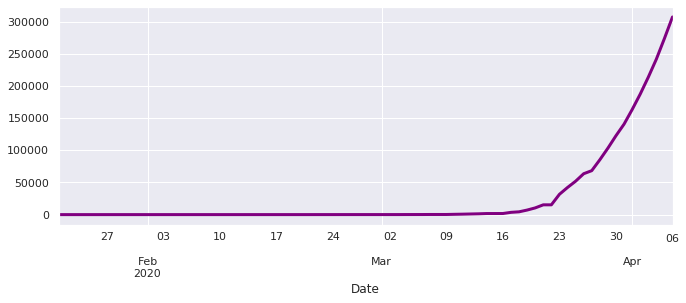

In [10]:
plot_data(USA_updated, 'Cumulative_Confirmed')

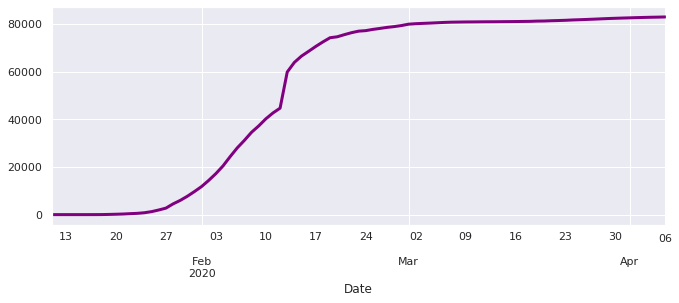

In [14]:
plot_data(China_updated, 'Cumulative_Confirmed')

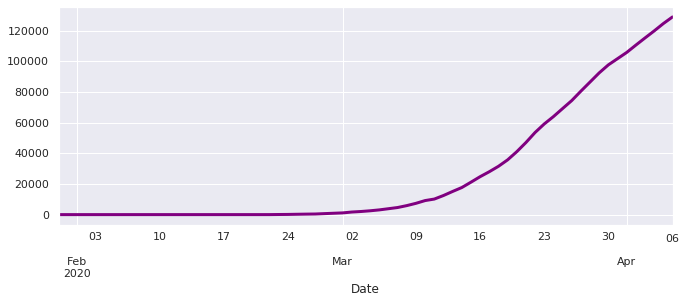

In [15]:
plot_data(Italy_updated, 'Cumulative_Confirmed')

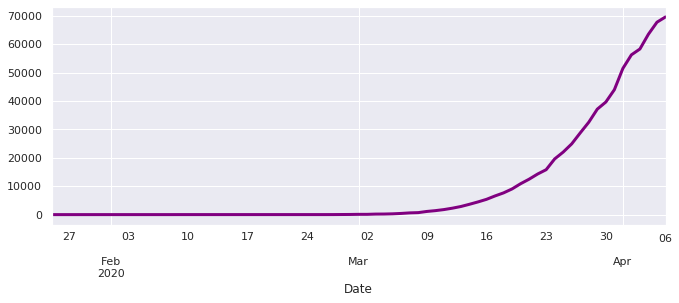

In [16]:
plot_data(France_updated, 'Cumulative_Confirmed')

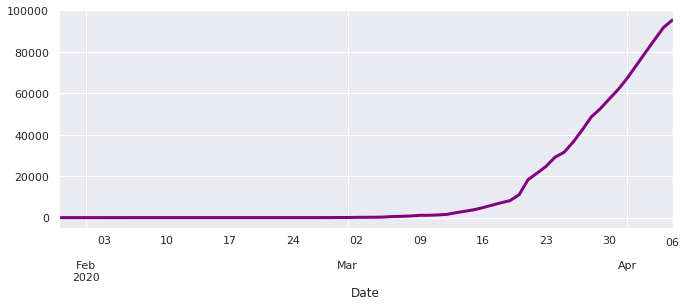

In [17]:
plot_data(Germany_updated, 'Cumulative_Confirmed')

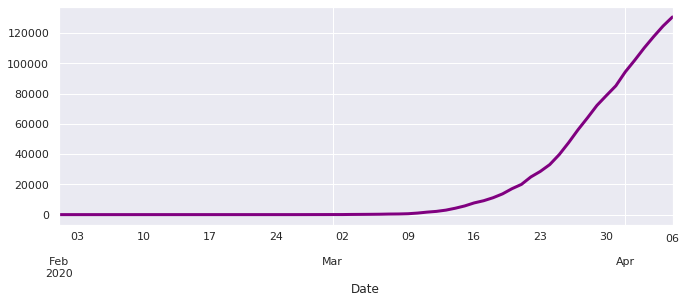

In [18]:
plot_data(Spain_updated, 'Cumulative_Confirmed')

In [64]:
# Train test split

def train_test_split(df,ratio):
    mask = np.random.rand(len(df)) < ratio
    df_train = df[mask]
    df_test = df[~mask]
    print('Training data set length='+str(len(df_train)))
    print('Testing data set length='+str(len(df_test)))
    
    # Expression for the Model
    expr = """ Confirmed ~ Day + Weekday + Month + Year"""

    ## Matrix Formation
    y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
    return X_train, y_train, X_test, y_test

def train_model(y_train, X_train):
    model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
    print(model.summary())
    return(model)

def predict(model, X_test):
    poisson_predictions = model.get_prediction(X_test)
    #.summary_frame() returns a pandas DataFrame
    predictions_summary_frame = poisson_predictions.summary_frame()
    print(predictions_summary_frame)
    return(predictions_summary_frame)
    
    
def plot_results(predictions_summary_frame, y_test, country):
    predicted_counts=predictions_summary_frame['mean']
    actual_counts = y_test['Confirmed']
    fig = plt.figure()
    fig.suptitle(str('Predicted Mean of Covid 19 Cofirmed Cases Count'))
    predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
    actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
    plt.legend(handles=[predicted, actual])
    plt.show()
    return(predicted_counts, actual_counts)
    
def plot_actual_vs_output(predicted_counts, actual_counts):
    plt.clf()
    fig = plt.figure()
    fig.suptitle('Scatter plot of Actual versus Predicted counts')
    plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
    plt.xlabel('Predicted counts')
    plt.ylabel('Actual counts')
    plt.show()

## USA MODEL: Poisson Regression for confirmed Cases Count

### STEP 1: TEST TRAIN SPLIT

In [65]:
X_train, y_train, X_test, y_test = train_test_split(USA_updated,0.8) 

Training data set length=63
Testing data set length=14


### STEP 2: MODEL TRAINING AND SUMMARY

In [66]:
model_USA = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Confirmed   No. Observations:                   63
Model:                            GLM   Df Residuals:                       59
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24278.
Date:                Sat, 11 Apr 2020   Deviance:                       48275.
Time:                        16:56:01   Pearson chi2:                 4.60e+04
No. Iterations:                     8   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.683e-06   1.25e-08   -215.376      0.000   -2.71e-06   -2.66e-06
Day            0.1814      0.001    347.423      0.0

### STEP 3: PREDICTIONS

In [67]:
predictions_frame = predict(model_USA, X_test)

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2020-01-26     0.305101   0.007694       0.290387       0.320560
2020-01-28     0.474848   0.011707       0.452447       0.498357
2020-02-01     0.565799   0.014395       0.538277       0.594728
2020-02-07     1.707388   0.038402       1.633757       1.784338
2020-02-09     2.377451   0.050885       2.279782       2.479305
2020-02-20    18.346884   0.296470      17.774918      18.937255
2020-02-24    39.760611   0.585408      38.629630      40.924705
2020-03-03   147.584273   1.900371     143.906221     151.356330
2020-03-06   242.498611   2.650352     237.359258     247.749243
2020-03-08   337.667068   3.370675     331.124874     344.338519
2020-03-11   620.139966   5.371403     609.701068     630.757592
2020-03-17  1871.371072  11.330680    1849.294599    1893.711090
2020-03-20  3074.886486  13.492203    3048.555639    3101.444756
2020-03-25  7863.385244  

### STEP 4: PLOTTING THE RESULTS

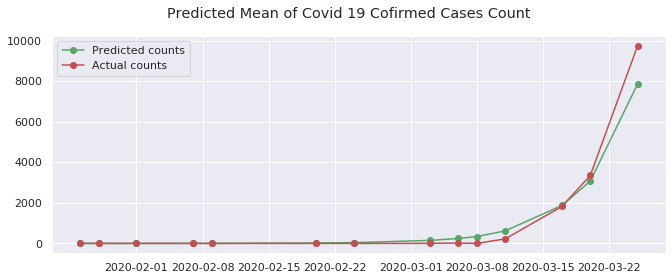

In [68]:
predicted_counts, actual_counts = plot_results(predictions_frame, y_test, USA)

## China MODEL: Poisson Regression for confirmed Cases Count

### STEP 1: TEST TRAIN SPLIT

In [69]:
X_train, y_train, X_test, y_test = train_test_split(China_updated,0.8) 

Training data set length=76
Testing data set length=11


### STEP 2: MODEL TRAINING AND SUMMARY

In [70]:
model_China = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Confirmed   No. Observations:                   76
Model:                            GLM   Df Residuals:                       72
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37168.
Date:                Sat, 11 Apr 2020   Deviance:                       73819.
Time:                        16:56:15   Pearson chi2:                 7.05e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.263e-06   4.23e-09    535.458      0.000    2.26e-06    2.27e-06
Day           -0.0794      0.001   -135.307      0.0

### STEP 3: PREDICTIONS

In [71]:
predictions_frame = predict(model_China, X_test)

                   mean   mean_se  mean_ci_lower  mean_ci_upper
Date                                                           
2020-01-20  1044.254373  9.521635    1025.758079    1063.084189
2020-01-25   635.564795  5.902019     624.101685     647.238453
2020-01-29   491.128226  5.009359     481.407549     501.045185
2020-01-30   444.698435  4.671619     435.635847     453.949552
2020-02-12   943.938538  4.419950     935.315226     952.641354
2020-02-13   854.701416  3.659339     847.559252     861.903764
2020-02-14   773.900504  3.745115     766.594914     781.275715
2020-02-19   541.490569  3.361132     534.942781     548.118503
2020-03-06   727.986261  5.185129     717.894201     738.220194
2020-03-14   378.129943  3.300288     371.716509     384.654031
2020-04-01   561.597225  6.391435     549.208923     574.264966


### STEP 4: PLOTTING THE RESULTS

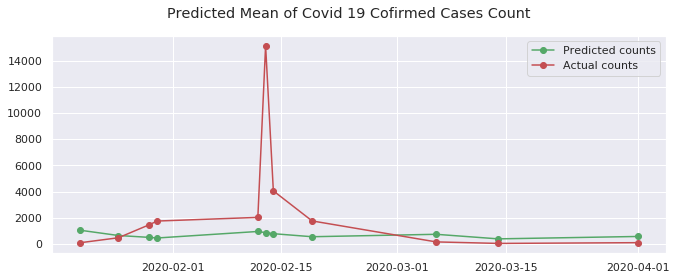

(Date
 2020-01-20    1044.254373
 2020-01-25     635.564795
 2020-01-29     491.128226
 2020-01-30     444.698435
 2020-02-12     943.938538
 2020-02-13     854.701416
 2020-02-14     773.900504
 2020-02-19     541.490569
 2020-03-06     727.986261
 2020-03-14     378.129943
 2020-04-01     561.597225
 Name: mean, dtype: float64, Date
 2020-01-20       77.0
 2020-01-25      462.0
 2020-01-29     1462.0
 2020-01-30     1741.0
 2020-02-12     2022.0
 2020-02-13    15152.0
 2020-02-14     4050.0
 2020-02-19     1751.0
 2020-03-06      146.0
 2020-03-14       30.0
 2020-04-01       87.0
 Name: Confirmed, dtype: float64)

In [72]:
plot_results(predictions_frame, y_test, China)

## ITALY MODEL: Poisson Regression for confirmed Cases Count

### STEP 1: TEST TRAIN SPLIT

In [28]:
X_train, y_train, X_test, y_test = train_test_split(Italy_updated,0.8) 

Training data set length=51
Testing data set length=17


### STEP 2: MODEL TRAINING AND SUMMARY

In [29]:
model_Italy = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   51
Model:                            GLM   Df Residuals:                       47
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1065.9
Date:                Sat, 11 Apr 2020   Deviance:                       1914.8
Time:                        15:20:23   Pearson chi2:                 1.61e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.333e-06      3e-08    -44.420      0.000   -1.39e-06   -1.27e-06
Day            0.1289      0.002     80.690      0.0

### STEP 3: PREDICTIONS

In [30]:
predictions_frame = predict(model_Italy, X_test)

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2020-01-30     3.570701   0.195669       3.207073       3.975558
2020-02-03     2.237805   0.131671       1.994059       2.511345
2020-02-07     3.350935   0.184013       3.009007       3.731718
2020-02-08     3.706824   0.203236       3.329144       4.127351
2020-02-13     7.466509   0.340621       6.827882       8.164869
2020-02-14     8.259497   0.373225       7.559446       9.024376
2020-02-27    45.362050   1.331608      42.825807      48.048495
2020-03-02    36.787536   1.211806      34.487487      39.240980
2020-03-04    45.016593   1.305287      42.529616      47.649001
2020-03-10   100.305372   2.178327      96.125517     104.666981
2020-03-13   135.778837   2.437361     131.084757     140.641009
2020-03-15   166.151403   3.433272     159.556756     173.018613
2020-03-20   334.672181   3.882560     327.148365     342.369030
2020-03-22   409.535488  

### STEP 4: PLOTTING THE RESULTS

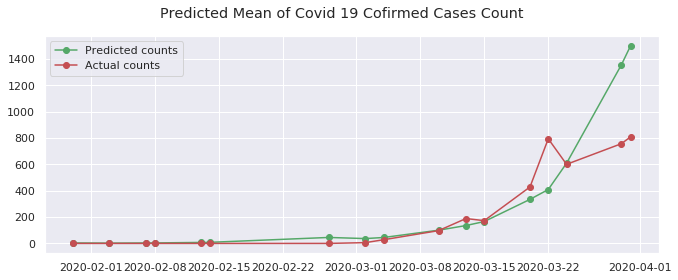

(Date
 2020-01-30       3.570701
 2020-02-03       2.237805
 2020-02-07       3.350935
 2020-02-08       3.706824
 2020-02-13       7.466509
 2020-02-14       8.259497
 2020-02-27      45.362050
 2020-03-02      36.787536
 2020-03-04      45.016593
 2020-03-10     100.305372
 2020-03-13     135.778837
 2020-03-15     166.151403
 2020-03-20     334.672181
 2020-03-22     409.535488
 2020-03-24     609.395512
 2020-03-30    1357.846935
 2020-03-31    1502.058268
 Name: mean, dtype: float64, Date
 2020-01-30      0.0
 2020-02-03      0.0
 2020-02-07      0.0
 2020-02-08      0.0
 2020-02-13      0.0
 2020-02-14      0.0
 2020-02-27      0.0
 2020-03-02      6.0
 2020-03-04     28.0
 2020-03-10     97.0
 2020-03-13    189.0
 2020-03-15    173.0
 2020-03-20    429.0
 2020-03-22    795.0
 2020-03-24    601.0
 2020-03-30    758.0
 2020-03-31    810.0
 Name: Deaths, dtype: float64)

In [31]:
plot_results(predictions_frame, y_test, Italy)

## FRANCE MODEL: Poisson Regression for confirmed Cases Count

### STEP 1: TEST TRAIN SPLIT

In [32]:
X_train, y_train, X_test, y_test = train_test_split(France_updated,0.8) 

Training data set length=59
Testing data set length=14


### STEP 2: MODEL TRAINING AND SUMMARY

In [33]:
model_France = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   59
Model:                            GLM   Df Residuals:                       55
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -776.12
Date:                Sat, 11 Apr 2020   Deviance:                       1380.6
Time:                        15:20:36   Pearson chi2:                 1.50e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.98e-06    8.4e-08    -47.370      0.000   -4.14e-06   -3.82e-06
Day            0.1840      0.004     51.327      0.0

### STEP 3: PREDICTIONS

In [34]:
predictions_frame = predict(model_France, X_test)

                  mean   mean_se  mean_ci_lower  mean_ci_upper
Date                                                          
2020-01-28    0.004071  0.000673       0.002945       0.005628
2020-02-04    0.011487  0.001891       0.008319       0.015862
2020-02-05    0.015746  0.002524       0.011501       0.021559
2020-02-18    0.150996  0.017667       0.120052       0.189916
2020-02-21    0.388912  0.040858       0.316539       0.477831
2020-02-24    0.399374  0.039397       0.329163       0.484561
2020-03-02    1.628080  0.150290       1.358627       1.950973
2020-03-04    3.059133  0.252478       2.602236       3.596252
2020-03-05    4.193337  0.327534       3.598107       4.887036
2020-03-11   11.091049  0.650449       9.886732      12.442065
2020-03-16   21.400507  0.998034      19.531133      23.448803
2020-03-20   75.556103  2.219291      71.329209      80.033477
2020-03-23   77.588659  2.315765      73.180049      82.262859
2020-03-28  375.495821  8.947198     358.362817     393

### STEP 4: PLOTTING THE RESULTS

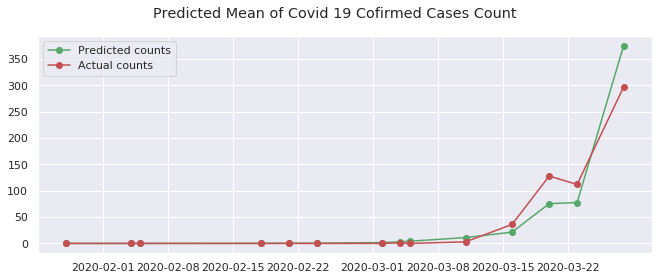

(Date
 2020-01-28      0.004071
 2020-02-04      0.011487
 2020-02-05      0.015746
 2020-02-18      0.150996
 2020-02-21      0.388912
 2020-02-24      0.399374
 2020-03-02      1.628080
 2020-03-04      3.059133
 2020-03-05      4.193337
 2020-03-11     11.091049
 2020-03-16     21.400507
 2020-03-20     75.556103
 2020-03-23     77.588659
 2020-03-28    375.495821
 Name: mean, dtype: float64, Date
 2020-01-28      0.0
 2020-02-04      0.0
 2020-02-05      0.0
 2020-02-18      0.0
 2020-02-21      0.0
 2020-02-24      0.0
 2020-03-02      0.0
 2020-03-04      1.0
 2020-03-05      0.0
 2020-03-11      3.0
 2020-03-16     36.0
 2020-03-20    128.0
 2020-03-23    112.0
 2020-03-28    297.0
 Name: Deaths, dtype: float64)

In [35]:
plot_results(predictions_frame, y_test, France)

In [36]:
USA_updated.head()

,Deaths,Cumulative_Deaths,Confirmed,Cumulative_Confirmed,Day,Month,Weekday,Year
Date,,,,,,,,
2020-01-21,0,0,1,1,21,1,1,2020
2020-01-22,0,0,0,1,22,1,2,2020
2020-01-23,0,0,0,1,23,1,3,2020
2020-01-24,0,0,0,1,24,1,4,2020
2020-01-25,0,0,1,2,25,1,5,2020


In [45]:
print(USA_updated['Cumulative_Confirmed'])
#for i in USA_updated.index:
 #   print()

Date
2020-01-21         1
2020-01-22         1
2020-01-23         1
2020-01-24         1
2020-01-25         2
2020-01-26         2
2020-01-27         5
2020-01-28         5
2020-01-29         5
2020-01-30         5
2020-01-31         6
2020-02-01         7
2020-02-02         8
2020-02-03        11
2020-02-04        11
2020-02-05        11
2020-02-06        12
2020-02-07        12
2020-02-08        12
2020-02-09        12
2020-02-10        12
2020-02-11        13
2020-02-12        13
2020-02-13        14
2020-02-14        15
2020-02-15        15
2020-02-16        15
2020-02-17        15
2020-02-18        15
2020-02-19        15
               ...  
2020-03-08       213
2020-03-09       213
2020-03-10       472
2020-03-11       696
2020-03-12       987
2020-03-13      1264
2020-03-14      1678
2020-03-15      1678
2020-03-16      1714
2020-03-17      3536
2020-03-18      4356
2020-03-19      7087
2020-03-20     10442
2020-03-21     15219
2020-03-22     15219
2020-03-23     31573
2020-03-

In [54]:
Italy_updated.head(128)

,Deaths,Cumulative_Deaths,Confirmed,Cumulative_Confirmed,Day,Month,Weekday,Year
Date,,,,,,,,
2020-01-30,0,0,2,2,30,1,3,2020
2020-01-31,0,0,0,2,31,1,4,2020
2020-02-01,0,0,0,2,1,2,5,2020
2020-02-02,0,0,0,2,2,2,6,2020
2020-02-03,0,0,0,2,3,2,0,2020
2020-02-04,0,0,0,2,4,2,1,2020
2020-02-05,0,0,0,2,5,2,2,2020
2020-02-06,0,0,0,2,6,2,3,2020
2020-02-07,0,0,1,3,7,2,4,2020


In [13]:
data_global = pd.read_csv('11th April 2020/WHO-COVID-19-global-data.csv')

In [14]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,10/04/2020,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
1,09/04/2020,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
2,08/04/2020,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
3,07/04/2020,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
4,06/04/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0


In [17]:
data_government = pd.read_csv('11th April 2020/Goverment_Policy.csv')

In [19]:
data_government.head()

,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,1,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,No,NaN,NaN,12/02/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN
1,2,Afghanistan,AFG,Kabul,NaN,Asia,Introduction / extension of measures,Public health measures,Introduction of isolation and quarantine policies,No,NaN,NaN,12/02/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN
2,3,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Awareness campaigns,No,NaN,NaN,12/02/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN
3,4,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,No,NaN,NaN,12/02/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN
4,5,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,NaN,12/03/2020,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...,14/03/2020,NaN


In [20]:
data_government.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4453 entries, 0 to 4452
Data columns (total 18 columns):
ID                    4453 non-null int64
COUNTRY               4453 non-null object
ISO                   4453 non-null object
ADMIN_LEVEL_NAME      252 non-null object
PCODE                 0 non-null float64
REGION                4453 non-null object
LOG_TYPE              4453 non-null object
CATEGORY              4452 non-null object
MEASURE               4453 non-null object
TARGETED_POP_GROUP    4440 non-null object
COMMENTS              4309 non-null object
NON_COMPLIANCE        3005 non-null object
DATE_IMPLEMENTED      4274 non-null object
SOURCE                4436 non-null object
SOURCE_TYPE           4435 non-null object
LINK                  4424 non-null object
ENTRY_DATE            4453 non-null object
Alternative source    351 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 626.3+ KB


In [25]:
data_government.CATEGORY.unique()

array(['Public health measures', 'Governance and socio-economic measures',
       'Social distancing', 'Movement restrictions', 'Lockdown',
       'Humanitarian exemption', nan], dtype=object)

In [27]:
len(data_government.MEASURE.unique())

38